In [1]:
import pandas as pd
import numpy as np
import torch

import json
from pathlib import Path

import pyciemss.visuals.plots as plots
import pyciemss.visuals.vega as vega
import pyciemss.visuals.trajectories as trajectories

from pyciemss.utils import get_tspan
from pyciemss.utils.interface_utils import convert_to_output_format


In [2]:
def tensor_load(path):
    with open(path) as f:
        data = json.load(f)

    data = {k: torch.from_numpy(np.array(v)) for k, v in data.items()}

    return data

In [3]:
# Load cached data...
tspan = get_tspan(1, 50, 500).detach().numpy()

root = Path("..")/".."/"test"/"data/"
prior_samples = convert_to_output_format(tensor_load(root/"prior_samples.json"), 
                                         tspan, time_unit="years")
observed_trajectory = convert_to_output_format(tensor_load(root/"observed_trajectory.json"), 
                                               tspan, time_unit="years")

observed_points = (observed_trajectory
    .rename(columns={"Rabbits_sol": "Rabbits Samples"})
    .drop(columns=["Wolves_sol", "alpha_param", "beta_param", "delta_param", "gamma_param"])
    .iloc[::10]
)


In [4]:
schema = plots.trajectories(
    prior_samples,
    keep=".*_sol",
    points=observed_points)
points = pd.DataFrame(vega.find_named(schema["data"], "points")["values"])
print(points.columns)



Index(['timepoint', 'sample_id', 'trajectory', 'value'], dtype='object')


In [5]:
vega.find_named(schema["data"], "traces")["values"]

[]

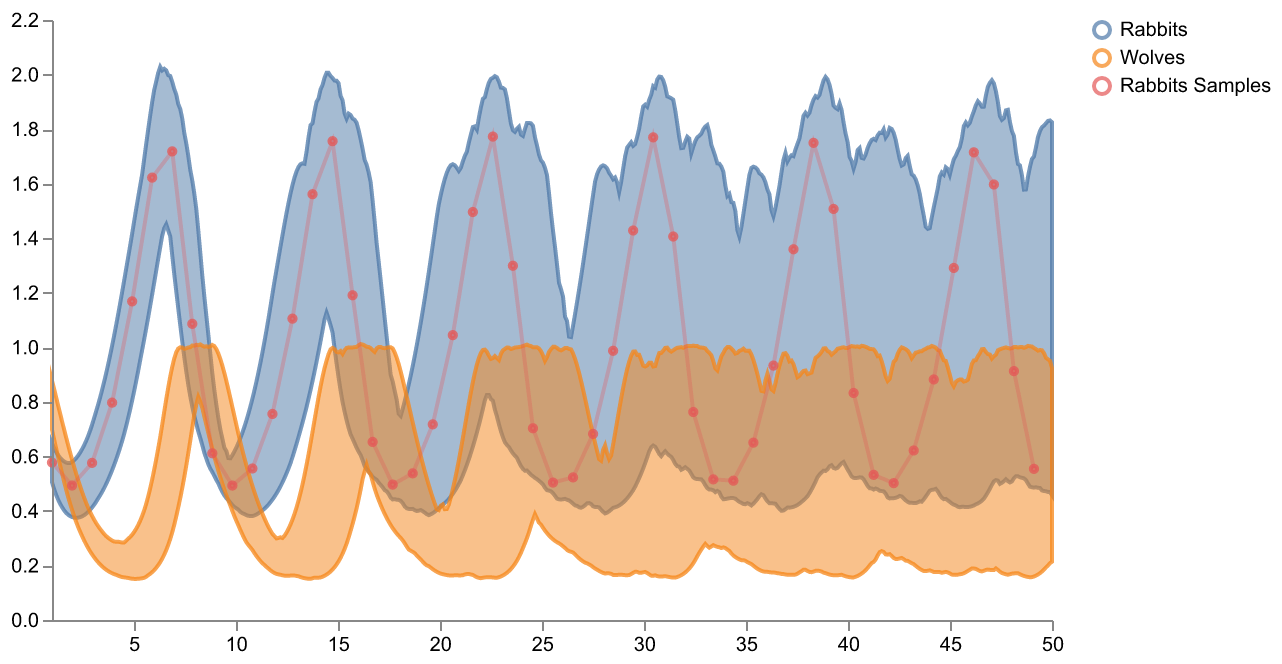

In [6]:
nice_labels={"Rabbits_sol": "Rabbits", "Wolves_sol": "Wolves"}

schema = plots.trajectories(prior_samples, 
                           keep=".*_sol", 
                           relabel=nice_labels,
                           points=observed_points
                           )
schema = plots.pad(schema, 5)

plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

In [9]:
traces = trajectories.select_traces(prior_samples,
                                    keep=".*_sol", 
                                    relabel={"Rabbits_sol": "Rabbits Example", "Wolves_sol": "Wolves Example"})

nice_labels={"Rabbits_sol": "Rabbits", "Wolves_sol": "Wolves"}
colors = {"Rabbits": "#aec7e8", 
          "Wolves": "#fdae6b",  
          "Wolves Example": "#ff7f0e",
          "Rabbits Example": "#1f77b4",
          "trash": "black", 
          "gamma": None}

schema = plots.trajectories(prior_samples,
                           traces=traces,
                           relabel=nice_labels,
                           colors=colors,
                           markers={"Confident": 10, "Uncertain": 25}
                           )
schema = plots.pad(schema, 5)
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, format="interactive")